# Анализ данных о продажах игр

**Цель исследования** — выявить определяющие успешность игры закономерности:

**Ход исследования**

Данные о продажах игр, оценки пользователей и экспертов, жанры и платформы получены из файла `/datasets/games.csv.`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Данные будут проверны  на ошибки и оценено их влияние на исследование. Затем, на этапе предобработки исправляются самые критичные ошибки данных.

На основе данных считаются и добавляются новые столбцы.
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Добавление новых столцов.
 4. Исследовательский анализ
 5. Проверка гипотез

##  Обзор данных

In [1]:
import pandas as pd

import numpy as np

import random as rd

import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

from math import factorial

from scipy import stats as st
# импорт библиотек

In [2]:
data = pd.read_csv('games.csv')


In [3]:
data.head()
# получение первых 10 строк таблицы data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.tail()
# получение последних 10 строк таблицы data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
data.describe().T
# получение общей информации о данных в таблице data

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [6]:
data.info()
# получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов. Тип данных в столбцах различается. Присутствует — `float64`(6), `object`(5).

Согласно документации к данным:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

В названиях колонок выявлено нарушение стиля.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Вывод**

Предварительно можно утверждать, что, данных достаточно для исследовательского анализа. Но встречаются пропуски в данных, некоторые из котрох можно исправить.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Исправление названий столбцов

In [7]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
data.columns = [col.lower() for col in data.columns]
# приводим названия столбцов к нижнему регистру через цикл

In [9]:
data.columns
# проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразовние данных в нужные типы

In [10]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format= '%Y')
data['year_of_release'] = pd.DatetimeIndex(data['year_of_release']).year

In [12]:
data.sort_values(by='year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN
1968,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN
6300,Bridge,2600,1980.0,Misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN
6875,Checkers,2600,1980.0,Misc,0.22,0.01,0.0,0.00,NaN,NaN,NaN


Было желание перевести столбцы `na_sales`,`eu_sales`,`jp_sales`,`other_sales` в формат `int` однако это привело бы к потере большого количества данных, что могло повлиять на итог исслеования.

In [13]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
# смена tbd, на значения "NaN"

In [14]:
data.query('user_score == "tbd"')['user_score'].count()
# проверка

0

Аббревиатура `tbd` обозначает, что рейтинг еще не определен, поэтому принято  решение поменять `tbd`, на значения "NaN", чтобы можно проводить математические операции со столбцом.
Так как рейтинг не определен, замена значения на "NaN" не скажется на итоге исследования.

**Пропуски**

В ходе предобработки выявлена определенная закономерность.
Пропуски в столбцах `critic_score`, `user_score`, `rating` напрямую связаны с двумя факторами:
1) С годом выпуска игры
- более ранние игры в большинстве своем без оценки и рейтинга

2) С количеством проданных копий
- если игра непопулярная и практически не покупалась, то у нее нет рейтинга и оценки

Два этих фактора взаимосвязаны друг с другом, так как более ранние игры в свое время покупались в десятки раз меньше, чем современные сейчас. Вероятнее всего это связано с техническим прогрессом, благодаря которому сейчас  большее количество людей имеет возможность приобрести приставку. 

### Добавление столбцов

In [15]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# создаем столбец с сумарными продажами

In [16]:
data.head()
# проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
def rating(value):
    if value == 'E':
        return 'Для всех'
    if value == 'M':
        return 'Для взрослых'
    if value == 'T':
        return 'Подросткам'
    if value == 'E10+':
        return 'От 10 лет и старше'
    if value == 'K-A':
        return 'Для детей и взрослых'
    if value == 'EC':
        return 'Для детей младшего возраста'
    if value == 'AO':
        return 'Только для взрослых'
    if value == 'RP':
        return 'Рейтинг ожидается'

In [19]:
data['rating_category'] = data['rating'].apply(rating)

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,rating_category
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Для всех
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,None
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Для всех
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Для всех
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,None


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

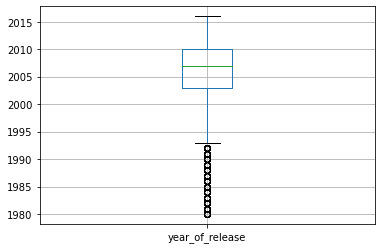

In [20]:
data.boxplot('year_of_release')
plt.show()

# диаграмма размаха

Исходя из диаграмы размаха, большинство игр вышло после 1993 года. Игры, которые вышли раньше можно считать выбросами, поэтому их можно не учитывать при анализе.

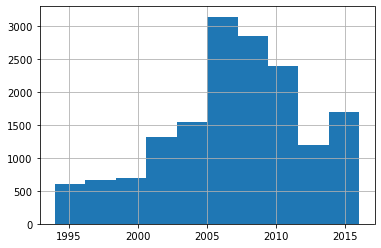

<AxesSubplot:>

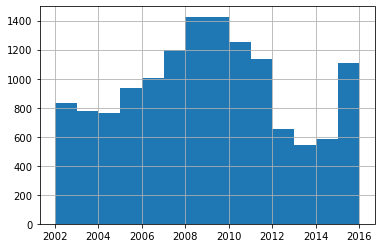

In [21]:
 (
    data
    .query('year_of_release > 1993')['year_of_release']
    .hist()
)
plt.show()
(
    data
    .query('year_of_release > 1993')['year_of_release']
    .hist(range=(2002, 2016), bins=14)
)

На основе построенной гистограммы можно сказать:
- после 2000 года количество выпущенных игр в год стало резко увеличиваться.
-  начиная с 2005 года объем выпущенных игр беспрерывно рос, и к 2010му количество выпущенных игр в год увеличилось в два раза с 700 в 2005г до 1400 в 2010г соответственно.
- с 2011г включительно количество выпускаемых игр пошло на спад, а в 2013 произошло резкое падение количества выпускаемых игр (чуть менее, чем в два раза)  с 1110 в 2012 до 650 в 2013г.
- в 2016г значения вновь выросли почти в два раза и вернулись на ометку более 1100 игр.

### Продажи по платформам

In [22]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,rating_category
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Для всех
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,None
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Для всех
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Для всех
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,None


In [23]:
platform_top = (
    data
    .pivot_table(index=['platform'], values='all_sales', aggfunc ='sum')
    .sort_values(by='all_sales', ascending=False)
    .head()
    .reset_index()
)
platform_top
# топ 5 платформ с наибольшими суммарными продажами

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


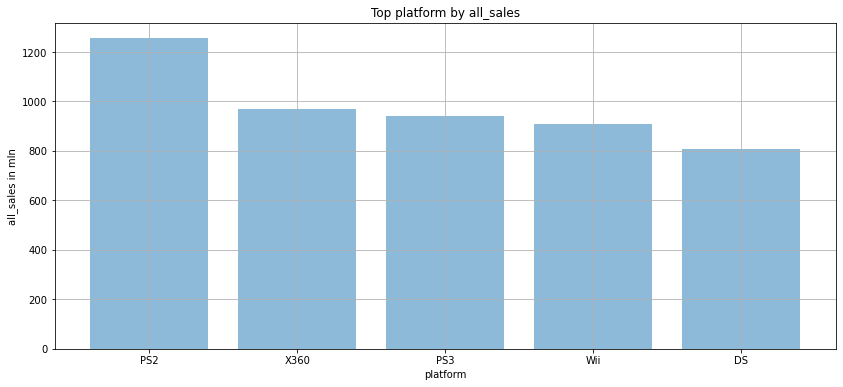

In [24]:
plt.figure(figsize=(14,6))
plt.bar(platform_top['platform'], platform_top['all_sales'],alpha = 0.5)
plt.title('Top platform by all_sales')
plt.ylabel('all_sales in mln')
plt.xlabel('platform')
plt.grid(True)
plt.show()
# столбчатая диагрмма с продажами по пяти платформам с наибольшим кол-вом продаж

In [25]:
platform_top_years = (data
    .query('year_of_release > 1993')
    .query('platform in ["PS2","X360","PS3","Wii","DS"]')
    .pivot_table(index=['year_of_release','platform'], values='all_sales', aggfunc ='sum')
)
platform_top_years

all_sales
year_of_release platform           
2000.0          PS2           39.17
2001.0          PS2          166.43
2002.0          PS2          205.38
2003.0          PS2          184.31
2004.0          DS            17.27
                PS2          211.81
2005.0          DS           130.14
                PS2          160.66
                X360           8.25
2006.0          DS           119.81
                PS2          103.42
                PS3           20.96
                Wii          137.15
                X360          51.62
2007.0          DS           146.94
                PS2           75.99
                PS3           73.19
                Wii          152.77
                X360          95.41
2008.0          DS           145.31
                PS2           53.90
                PS3          118.52
                Wii          171.32
                X360         135.26
2009.0          DS           119.54
                PS2           26.40
                PS3          130.93
                Wii          206.97
                X360         120.29
2010.0          DS            85.02
                PS2            5.64
                PS3          142.17
                Wii          127.95
                X360         170.03
2011.0          DS            26.18
                PS2            0.45
                PS3          156.78
                Wii           59.65
                X360         143.84
2012.0          DS            11.01
                PS3          107.36
                Wii           21.71
                X360          99.74
2013.0          DS             1.54
                PS3          113.25
                Wii            8.59
                X360          88.58
2014.0          PS3           47.76
                Wii            3.75
                X360          34.74
2015.0          PS3           16.82
                Wii            1.14
                X360          11.96
2016.0          PS3            3.60
                Wii            0.18
                X360           1.52

Исходя из данного распределения, можно сделать вывод о том, что характерный срок появления новых и исчезновения старых платформ - 7лет.

### Актуальный период

Основываясь на приведенном выше распределении, можно выделить актуальный период

In [26]:
data_actual = data.query('year_of_release > 2013')

In [27]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,rating_category
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,None
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,Для взрослых
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68,None
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,Для всех
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98,None


In [28]:
data_actual['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [29]:
platform_top_years_actual = data_actual.pivot_table(index=['year_of_release','platform'], values='all_sales', aggfunc ='sum')

platform_top_years_actual.head()
# расределение по годам за актуальный период

all_sales
year_of_release platform           
2014.0          3DS           43.76
                PC            13.28
                PS3           47.76
                PS4          100.00
                PSP            0.24

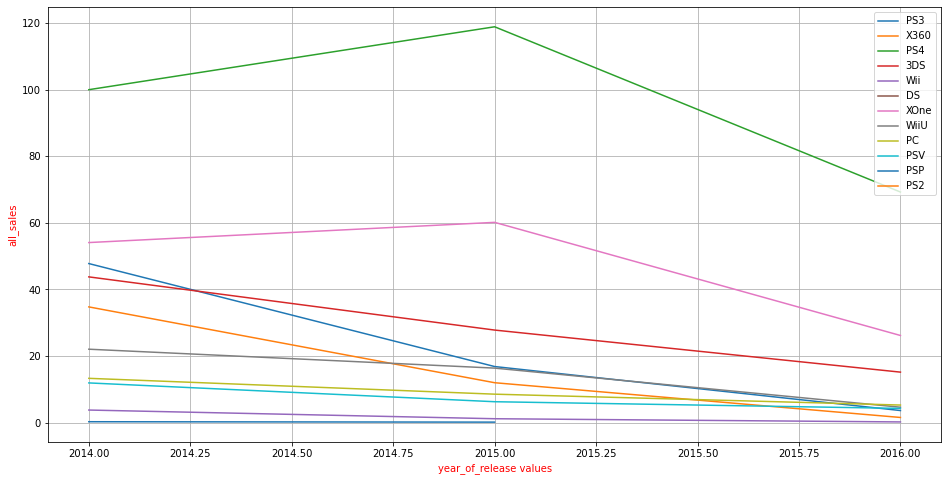

In [30]:
for a in ['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2']:
    b = a
    (platform_top_years_actual
        .reset_index('platform')
        .query('platform ==@b')['all_sales']
        .plot(label = a, legend = True, figsize = (16,8), grid=True)
    )

plt.ylabel('all_sales', color='red')
plt.xlabel('year_of_release values',color='red')
plt.show()
# график по продажам платформ за актуальный период

На основании данного графика можно сказать следующее:
- начиная с 2014 на рынке лидируют PS4 и  XONE, на треем месте - 3DS
- на неплохом уровне продаж (от пяти миллионов копий )  находятся также приставки PC и PSV

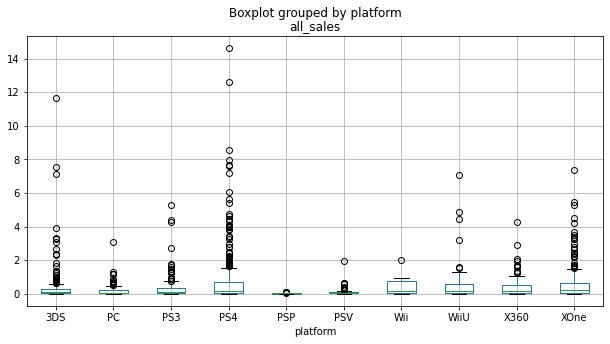

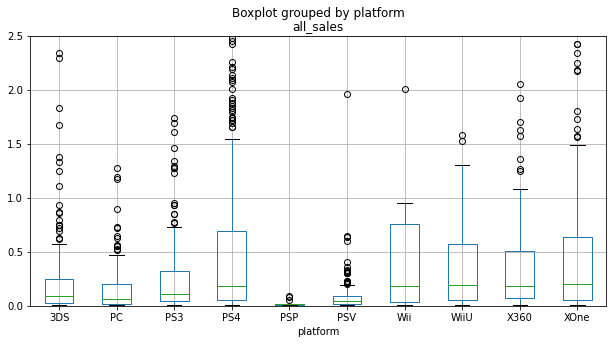

In [31]:
data_actual.boxplot('all_sales',by='platform', figsize=(10,5))

data_actual.boxplot('all_sales',by='platform', figsize=(10,5))
plt.ylim(0, 2.5)

plt.show()

На основании данного графика можно сказать следующее:
- у многих приставок есть сильные выбросы, у некоторых они доходят до 10, 15 и даже 20млн копий
- ящик с усами подтверждает выводы по первому графику, о том что лидерами на рынке являются (являлись) PS4, XONE, PS3, X360

### Влияние на продажи PS4 отзывов  пользователей и критиков

In [32]:
data_actual_ps4 = data_actual.query('platform == "PS4"')
data_actual_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,rating_category
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,None
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,Для взрослых
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,Для всех
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98,None
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,Для взрослых


In [33]:
factor = ['user_score','critic_score']

In [34]:
def cor(factors, element, data):
    for a in factors:
        print(f'Корреляция {a} к {element} = {round(data[element].corr(data[a]), 2)}')
# функция, высчитывающая корреляцию элементов из списка к заданному элементу

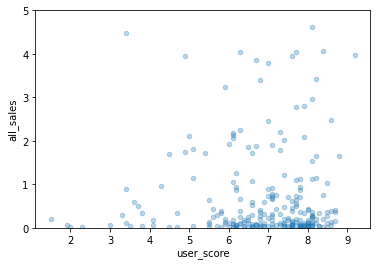

Корреляция user_score к all_sales = -0.04


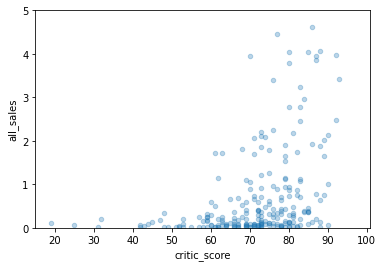

Корреляция critic_score к all_sales = 0.4


In [35]:
for a in factor:
    b = [a]
    data_actual_ps4.plot(x=a, y='all_sales', kind='scatter', alpha=0.3)
    plt.ylim(0, 5)
    plt.show()
    cor(b,'all_sales',data_actual_ps4)
# применение функции и построение диаграммы рассеяния

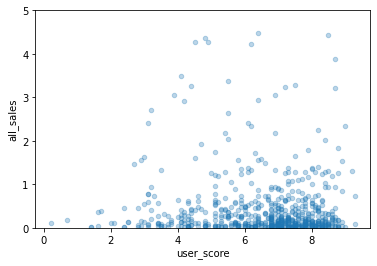

Корреляция user_score к all_sales = -0.02


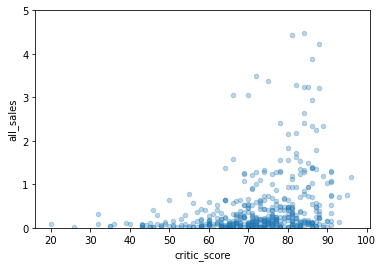

Корреляция critic_score к all_sales = 0.31


In [36]:
data_actual_no_ps4 = data_actual.query('platform != "PS4"')

for a in factor:
    b = [a]
    data_actual_no_ps4.plot(x=a, y='all_sales', kind='scatter', alpha=0.3)
    plt.ylim(0, 5)
    plt.show()
    cor(b,'all_sales',data_actual_no_ps4)

На основании данного графика можно сказать следующее:
- зависимости между продажами и пользовательскими оценками у платформы PS4 нет.
- между продажами и оценками критиков  на платформе PS4 есть положительная зависимость, но ее нельзя назвать сильной.

- Результа, основанные на PS4, полностью отражают картину по другим платформам.  

### Анализ жанров по данным

In [37]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,rating_category
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,None
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,Для взрослых
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68,None
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,Для всех
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98,None


In [38]:
data_genre = data_actual.pivot_table(index='genre', values='all_sales', aggfunc=['count','sum','median'])#.sort_values(by='all_sales'))
data_genre.columns = ['sales_count','sales_sum', 'sales_median']
data_genre['sales_mean'] = round(data_genre['sales_sum'] / data_genre['sales_count'], 2)
data_genre.sort_values(by='sales_sum')
# сводная таблица по жанрам с расчетом количества игр в жанре, суммы проданных копий и среднего количества продаж каждой игры
# отсортирована по сумме продаж

,sales_count,sales_sum,sales_median,sales_mean
genre,,,,
Puzzle,14,2.21,0.045,0.16
Strategy,37,3.96,0.060,0.11
Simulation,44,13.13,0.100,0.30
Adventure,185,17.55,0.030,0.09
Platform,38,18.09,0.140,0.48
Racing,69,27.52,0.090,0.40
Fighting,60,28.22,0.125,0.47
Misc,113,37.55,0.090,0.33
Role-Playing,221,101.44,0.110,0.46


In [39]:
data_genre.sort_values(by='sales_median')

,sales_count,sales_sum,sales_median,sales_mean
genre,,,,
Adventure,185,17.55,0.030,0.09
Puzzle,14,2.21,0.045,0.16
Strategy,37,3.96,0.060,0.11
Action,619,199.36,0.090,0.32
Misc,113,37.55,0.090,0.33
Racing,69,27.52,0.090,0.40
Simulation,44,13.13,0.100,0.30
Role-Playing,221,101.44,0.110,0.46
Fighting,60,28.22,0.125,0.47


**Вывод**
О жанрах можно сказать следующее:

1) Жанрами с наибольшими продажами являются `Action` и `Shooter`. Суммарное колличество проданных коппий по всем играм в этих жанрах равно 557.80 млн и 402.91млн копий соответственно.

2)  Жанрами с наименьшими продажами являются `Puzzle` и `Strategy`. Суммарное колличество проданных коппий по всем играм в этих жанрах равно 9.85 млн и 22.16 млн копий соответственно.

3) Самыми прибыльными жанрами можно назвать `Sports` и `Shooter`, потому что они являются лидерами с точки зрения медианных продаж  со значениями в 0.68млн и 1.34млн копий соответственно. 


###  Портрет пользователя каждого региона

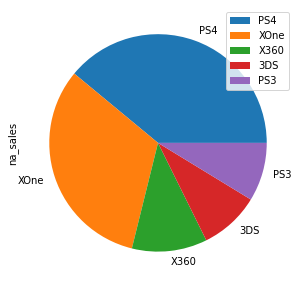

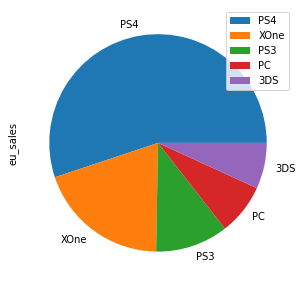

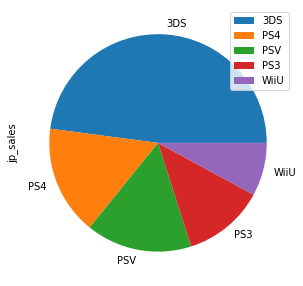

In [40]:
for a in ['na_sales','eu_sales','jp_sales']:
    data_platform = data_actual.pivot_table(index='platform', values=a, aggfunc=['sum'])#.sort_values(by='all_sales'))
    data_platform.columns = [a]
    data_platform = data_platform.sort_values(by=a, ascending=False).head()
    data_platform[a].plot(kind='pie', grid=True,legend=True, figsize=(10,5))
    plt.show()
# цикл для отрисовки графиков самых популярных платформ по регионам 

**Вывод по платформам**

1) Топ 5 платформ по регионам сильно различается, но есть некоторые сходства:
- во всех регионах в топ 5 входит PS3, PS4, 3DS 

2) Довольно схожи между собой  Европа и Северная Америка:
- Топ 2 в этих регионах совпадает
- для обоих регионов также характерен тот факт, что  платформа 3DS хоть и входит топ 5, однако занимает в этих регионах последнее и предпоследнее место сильно отставая от лидеров

3) Наиболее сильно отличается от других регион Японии:
- так в отличие от Европы и Северной Америки, в которых платформа 3DS занимает последние места, в Японии она находится на первом месте с большим отрывом от конкурентов, занимая практически 50% рынка
- также в топ 5 Японии входят WIU и PSV, которых нет в Топ 5 Европы и Северной Америки

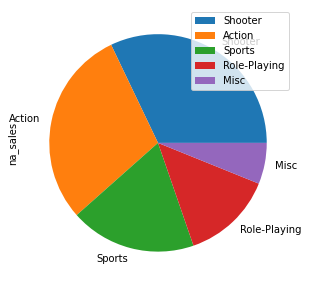

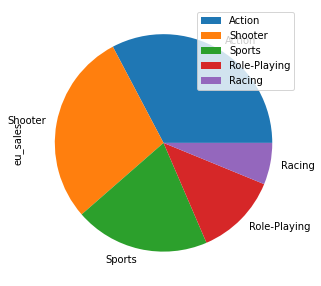

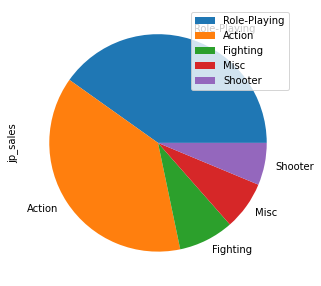

In [41]:
for a in ['na_sales','eu_sales','jp_sales']:
    data_genre = data_actual.pivot_table(index='genre', values=a, aggfunc=['sum'])#.sort_values(by='all_sales'))
    data_genre.columns = [a]
    data_genre = data_genre.sort_values(by=a, ascending=False).head()
    data_genre[a].plot(kind='pie', grid=True,legend=True, figsize=(10,5))
    plt.show()


**Вывод по жанрам**

1) Топ 5 жанров по регионам имеют некоторые сходства:
- во всех регионах большую долю занимает жанр Action. В Европе и Северной Америке он занимае первое место, в Японии второе, но лишь немного уступая конкуренту.
- во всех регионах в топ 5 входит жанр  Role-Playing

2) Довольно схожи между собой  Европа и Северная Америка:
- данные регионны практически идентичны с точки зрения предпочтений по жанрам. Распределение первых четырех жанров полностью одинаковое
- Отличаются данные регионы только пятым по популярности жанром. Так в Евроре это Racing, а в Северной Америке - Misc

3) Наиболее сильно отличается от других регион Японии:
- так в отличие от Европы и Северной Америки, в которых жанр Role-Playing занимает предпоследние места, в Японии он находится на первом месте , опередив даже довльно популярный во всех регионах жанр Action
- существенным отличием является отсутвие в топе Японии жанра Shooter, который занимает второе место в Северной Америке и Европе, занимая в данных регионах существенную долю рынка 
- также в топ 5 Японии входят жанры Fighting и Platform, которых нет в Топ 5 Европы и Северной Америки

In [42]:
data_actual = data_actual.fillna(value= {'rating_category':'без рейтинга'})

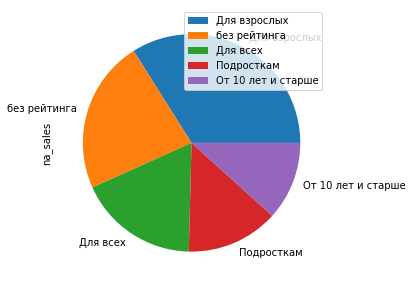

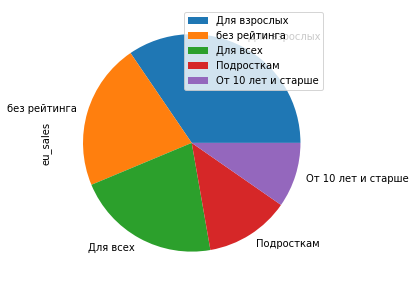

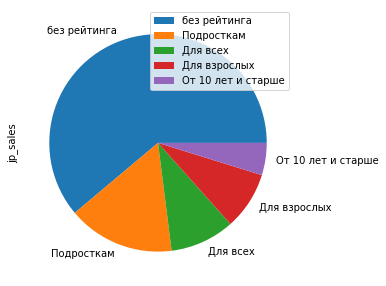

In [43]:
for a in ['na_sales','eu_sales','jp_sales']:
    data_genre = data_actual.pivot_table(index='rating_category', values=a, aggfunc=['sum'])#.sort_values(by='all_sales'))
    data_genre.columns = [a]
    data_genre = data_genre.sort_values( by=a, ascending=False).head()
    data_genre[a].plot(kind='pie', grid=True,legend=True, figsize=(10,5))
    plt.show()
    

**Вывод по рейтингам**

1) Топ 5 рейтингов по регионам имеют некоторые сходства:
- 5 из 5ти в топе во всех регионах одинаковые. Таковыми являются рейтинг `Для всех`, `Для взорослых`, `От 10 лет и старше`, `Подросткам`, `Без рейтинга`.
- 5е место во всех регионах за категорией `От 10 лет и старше`

2) Довольно схожи между собой  Европа и Северная Америка:
- Топ 5 в этих рейтингах практически идентичен.

3) Наиболее сильно отличается от других регион Японии:
- так в отличие от Европы и Северной Америки, в которых рейтинг `Для взрослых` занимает первое место, в Японии он находится только на 4м месте.
- существенным отличием является тот факт, что рейтинг `Подросткам` в Японии занимает лидирующие позиции, находясь на втором месте, в то время как в Евроре и Северной Америке игры данного рейтинга находятся только на четвертом месте.  

Отдельно стоит отметить тот факт, что игры без рейтинга занимают большую долю во всех регионах. Особенно сильно данный факт бросается в глаза в Японии, где игры без рейтинга занимают порядка 60%.


##  Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [44]:
xbox_one = data_actual.query('platform == "XOne"')['user_score']#.astype('int')
xbox_one = xbox_one.dropna()

pc = data_actual.query('platform == "PC"')['user_score']#.astype('int')
pc = pc.dropna()
pc = pc[:len(xbox_one)]

# подготовка выборки для проверки

In [45]:
alpha = .05

results = st.ttest_ind(xbox_one,pc)

print('p-значение:',results[1]) 

if results[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
# проверка гипотезы

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные.


In [46]:
sports = data_actual.query('genre == "Sports"')['user_score']#.astype('int')
sports = sports.dropna()

action = data_actual.query('genre == "Action"')['user_score']#.astype('int')
action = action.dropna()
action = action[:len(sports)]
# подготовка выборки для проверки

In [47]:
alpha = .05

results = st.ttest_ind(action,sports)

print('p-значение:',results[1]) 

if results[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
# проверка гипотезы

p-значение: 3.248693615039004e-12
Отвергаем нулевую гипотезу


**Вывод**

1) **Гипотеза**: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
- нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны
- альтернативная: средние пользовательские рейтинги платформ Xbox One и PC различаются
- вероятность равного среднего рейтинга пользователей оказалась выше порогового значения (0.05), поэтому нулевая гипотеза не отвергается

2) **Гипотеза**: "Средние пользовательские рейтинги жанров Action и Sports разные"
- нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны
- альтернативная: средние пользовательские рейтинги жанров Action и Sports отличаются
- вероятность равного среднего рейтинга пользователей оказалась ниже порогового значения (0.05), поэтому нулевая гипотеза отвергается, в пользу альтернатиной.

## Вывод

Исследование проходило в несколько этапов:

1) Обзор данных

2) Предобратока данных

В ходе предобратки:
- испавлены названия столбцов
- дубликаты не обнаружены
- заполнены некоторые пропуски

3) Добавление столбцов

На этом этапе были добавлены следующие столбцы:
- суммарные продажи во всех регионах
- расшифровка рейтинга ESRB


4) Исследовательский анализ данных

На данном этапе :
- определен актуальный период для, котрый поможет построить прогноз на 2017г   
- выявлены лидеры по продажам и определены потенциально прибыльные платформы
- построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам
- Рассмотренно влияние на продажи PS4 отзывов пользователей и критиков
- Определены самые прибыльные жанры, а также жанры с наиболее высокими и низкими продажами

5) Составление портрета пользователя каждого региона
На данном этапе :
- определены самые популярные платформы (топ-5) в регионах.
- определены самые популярные жанры (топ-5) в регионах.
- определено влияние рейтинаг ESRB на продажи в отдельном регионе

6) Проверка гипотез

В результате проверки гипотез было установлено:
- средние пользовательские рейтинги жанров Action и Sports разные;
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые